# Import Libraries

In [1]:
# Scientific libraries

import numpy as np
import math

# Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data analysis and ML libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.offline as pyo
import plotly.graph_objs as go


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data prep - Exploratory Data Analysis

Some of the things to do:

- [X] Import the data
- [X] Make the dataset more readable
- [ ] Correct data interpretation -> have the right data
- [X] Deal with missing values
- [X] Keep data unique -> remove duplicates
- [X] Ensure correct formatting
- [ ] Detecting outliers
- [ ] Filter data
- [ ] Organize columns

# Import and wrangling

In [3]:
# Import data from CSV file

df = pd.read_csv('Data/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Shape of the dataframe

df.shape

(253680, 22)

In [5]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
### Rename columns for readability

df.rename(columns={'Diabetes_binary':'Diabetes_status',
                            'HeartDiseaseorAttack':'Heart_condition',
                            'PhysActivity':'Physical_activity',
                            'HvyAlcoholConsump':'Heavy_drinking',
                            'AnyHealthcare':'Health_plan',
                            'NoDocbcCost':'No_Doctor_bc_Cost',
                            'GenHlth':'General_health',
                            'MentHlth':'Mental_health', 
                            'PhysHlth':'Physical_health','DiffWalk':'Difficulty_walking',
                            'HighBP':'High_BP','CholCheck':'Chol_check','HighChol':'High_Chol'},
                   inplace=True)

df.columns

Index(['Diabetes_status', 'High_BP', 'High_Chol', 'Chol_check', 'BMI',
       'Smoker', 'Stroke', 'Heart_condition', 'Physical_activity', 'Fruits',
       'Veggies', 'Heavy_drinking', 'Health_plan', 'No_Doctor_bc_Cost',
       'General_health', 'Mental_health', 'Physical_health',
       'Difficulty_walking', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [7]:
# Descriptive statistics (makes more sense for the non-binary variables)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_status,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
High_BP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
High_Chol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
Chol_check,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Heart_condition,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
Physical_activity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
### For now I will not drop the duplicates

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Diabetes_status     229474 non-null  float64
 1   High_BP             229474 non-null  float64
 2   High_Chol           229474 non-null  float64
 3   Chol_check          229474 non-null  float64
 4   BMI                 229474 non-null  float64
 5   Smoker              229474 non-null  float64
 6   Stroke              229474 non-null  float64
 7   Heart_condition     229474 non-null  float64
 8   Physical_activity   229474 non-null  float64
 9   Fruits              229474 non-null  float64
 10  Veggies             229474 non-null  float64
 11  Heavy_drinking      229474 non-null  float64
 12  Health_plan         229474 non-null  float64
 13  No_Doctor_bc_Cost   229474 non-null  float64
 14  General_health      229474 non-null  float64
 15  Mental_health       229474 non-nul

In [9]:
### Change dtype to int
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Diabetes_status     229474 non-null  int64
 1   High_BP             229474 non-null  int64
 2   High_Chol           229474 non-null  int64
 3   Chol_check          229474 non-null  int64
 4   BMI                 229474 non-null  int64
 5   Smoker              229474 non-null  int64
 6   Stroke              229474 non-null  int64
 7   Heart_condition     229474 non-null  int64
 8   Physical_activity   229474 non-null  int64
 9   Fruits              229474 non-null  int64
 10  Veggies             229474 non-null  int64
 11  Heavy_drinking      229474 non-null  int64
 12  Health_plan         229474 non-null  int64
 13  No_Doctor_bc_Cost   229474 non-null  int64
 14  General_health      229474 non-null  int64
 15  Mental_health       229474 non-null  int64
 16  Physical_health     

In [10]:
df.head(3)

,Diabetes_status,High_BP,High_Chol,Chol_check,BMI,Smoker,Stroke,Heart_condition,Physical_activity,Fruits,...,Health_plan,No_Doctor_bc_Cost,General_health,Mental_health,Physical_health,Difficulty_walking,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8


In [11]:
df.nunique().sort_values()

Diabetes_status        2
Sex                    2
Difficulty_walking     2
No_Doctor_bc_Cost      2
Health_plan            2
Heavy_drinking         2
Fruits                 2
Physical_activity      2
Veggies                2
Stroke                 2
Smoker                 2
Chol_check             2
High_Chol              2
High_BP                2
Heart_condition        2
General_health         5
Education              6
Income                 8
Age                   13
Mental_health         31
Physical_health       31
BMI                   84
dtype: int64

In [12]:
# We have 14 binary features
# General Health
# Education
# Income
# Age
# Mental and Physical health
# BMI

## Explore

Given that the data is given as integers, and some features actually represent categorical variables -> Create a categorical df to ease the visualization

In [13]:
### Binary features -> 0: "No" and 1: "Yes" except Sex -> 0:"Female" and 1:"Male"
binary_features  = [col for col in df.drop(columns='Diabetes_status').columns if df[col].nunique()==2]

In [14]:
binary_features

['High_BP',
 'High_Chol',
 'Chol_check',
 'Smoker',
 'Stroke',
 'Heart_condition',
 'Physical_activity',
 'Fruits',
 'Veggies',
 'Heavy_drinking',
 'Health_plan',
 'No_Doctor_bc_Cost',
 'Difficulty_walking',
 'Sex']

In [15]:
### Define dictionaries: they will be useful later

binary_dict = {0:'No',1:'Yes'} ### Dictionary for binary variables
diagnose_dict = {0:'Non-diabetic',1:'Diabetic'} ### Dictionary for the diabetes_status
sex_dict = {0:'Female',1:'Male' }### Sex Dictionary
general_health_dict = {1:'Excellent',2:'Very good',3:'Good',4:'Fair',5:'Poor'} ### General Health Dictionary
age_dict = {1:'18-24', 2:'25-29', 3:'30-34', 4:'35-39', 5:'40-44', 6:'45-49', 7:'50-54', 8:'55-59', 9:'60-64', 10:'65-69', 11:'70-74', 12:'75-79', 13:'above 80'}
education_dict = {1:"Kindergarten",2:"Elementary",3:"Some high school",4:"High school graduate",5:"Some college/tecnical school",6:"College graduate"} ### Education
income_dict = {1:"less than 10K",2:"10-15K",3:"15-20K",4:"20-25K",5:"25-35K",6:"35-50K",7:"50-75K",8:"75K or above"}


### Let's create a categorical data frame (for easing the plotting)

In [16]:
df_cat = df.replace({"Diabetes_status":diagnose_dict
                     ,"Sex":sex_dict,
                     "General_health":general_health_dict,"Age":age_dict,
                    "Income": income_dict,
                    "High_BP": binary_dict,
                    "High_Chol": binary_dict,
                    'Chol_Check': binary_dict,
                    'Smoker':binary_dict,
                    'Stroke':binary_dict,
                    'Heart_condition':binary_dict,
                    'Physical_activity':binary_dict,
                    'Fruits':binary_dict,
                    'Veggies':binary_dict,
                    'Heavy_drinking':binary_dict,
                    'Health_plan':binary_dict,
                    'No_Doctor_bc_Cost':binary_dict,
                    'Difficulty_walking':binary_dict}
                   )

In [17]:
#Save the new data frames

df.to_csv('Data/diabetes_renamed.csv', index=False)
df_cat.to_csv('Data/diabetes_cat.csv',  index=False)

### Univariate Analysis

#### Diabetes Count

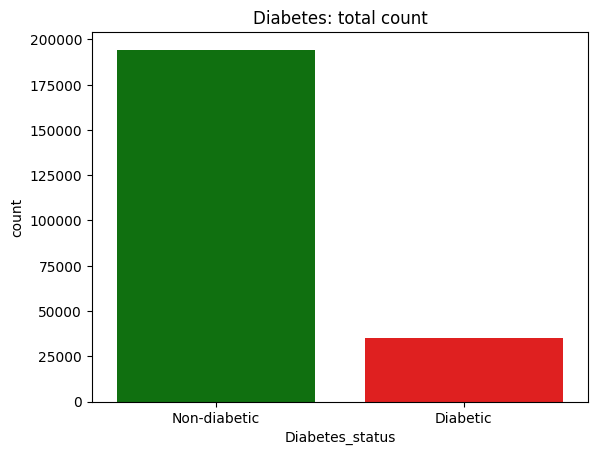

In [18]:
ax = sns.countplot(data=df, x="Diabetes_status", palette=["green","red"])

ax.set_xticklabels(diagnose_dict.values())
#plt.xlabel("Diabetes diagnosis");
plt.title("Diabetes: total count");

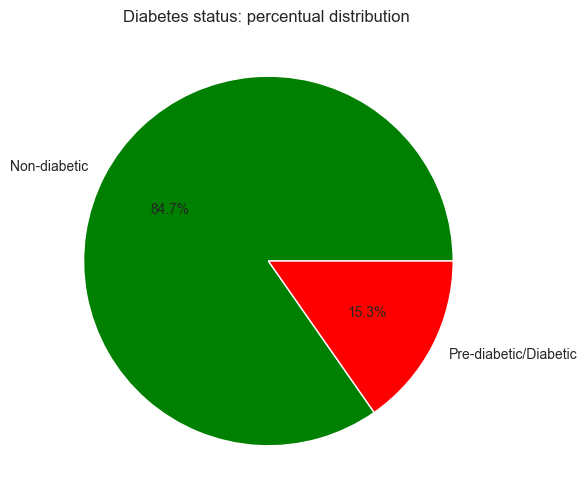

In [19]:
target_counts = df["Diabetes_status"].value_counts(normalize=True)
plt.figure(figsize=(6,6))
sns.set_style("whitegrid") # Set style for chart
plt.pie(target_counts,labels=['Non-diabetic','Pre-diabetic/Diabetic'],colors=['Green','Red'],autopct='%1.1f%%');
plt.title("Diabetes status: percentual distribution ");

#### Diabetes count by Sex

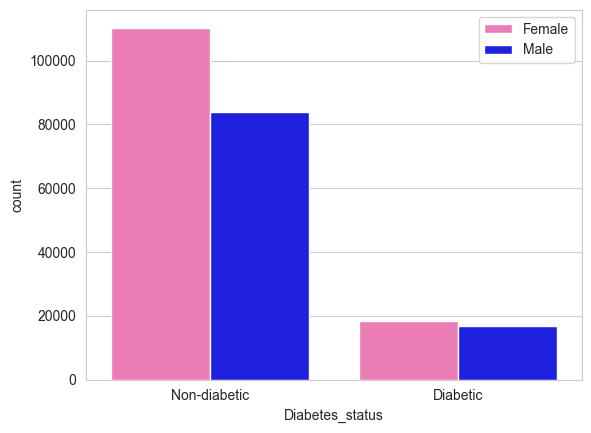

In [20]:
ax = sns.countplot(data=df, x="Diabetes_status", hue="Sex",palette=["hotpink","blue"])
ax.set_xticklabels(diagnose_dict.values())
plt.legend(sex_dict.values());

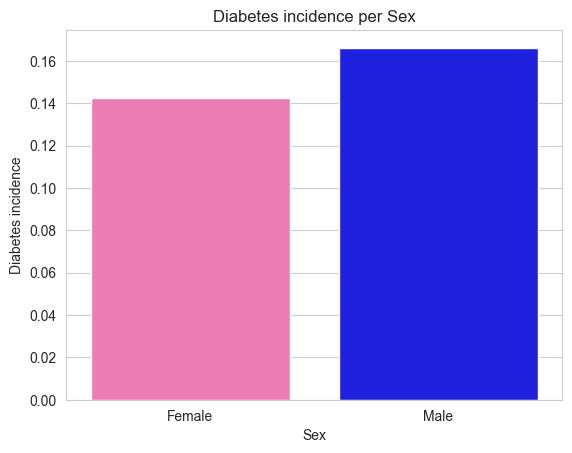

In [21]:
Diabetes_sex = df[["Sex", "Diabetes_status"]].groupby("Sex").mean().rename(index=sex_dict)

ax = sns.barplot(data=Diabetes_sex, x="Sex", y="Diabetes_status",palette=["hotpink","blue"])
plt.ylabel("Diabetes incidence")
plt.xlabel("Sex");
plt.title("Diabetes incidence per Sex");


14 % of Females are diabetic
15 % of Males are diabetic

In [22]:
def plot_diabetes_by_feature(features):
    fig = plt.figure(figsize=(15, 45))
    for index, feature in enumerate(features):
        Diabetes_by_feat = df[[feature, "Diabetes_status"]].groupby(feature).mean().rename(index=binary_dict)
        #print(Diabetes_by_feat)
    
        plt.subplot(10,2,index+1)
        g = sns.barplot(data=Diabetes_by_feat, x=feature, y="Diabetes_status",palette=["yellowgreen","orangered"])
        g.set_xticklabels(binary_dict.values())
        plt.ylabel(f"Percent of diabetics by response")
        plt.xlabel(feature);
        plt.title(f"Diabetes incidence per {feature}");

    plt.show();

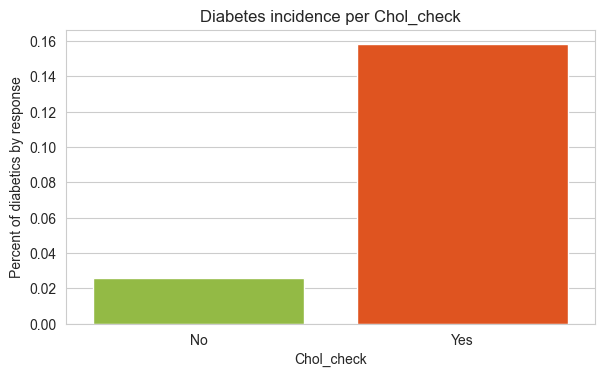

In [23]:
plot_diabetes_by_feature(["Chol_check"])

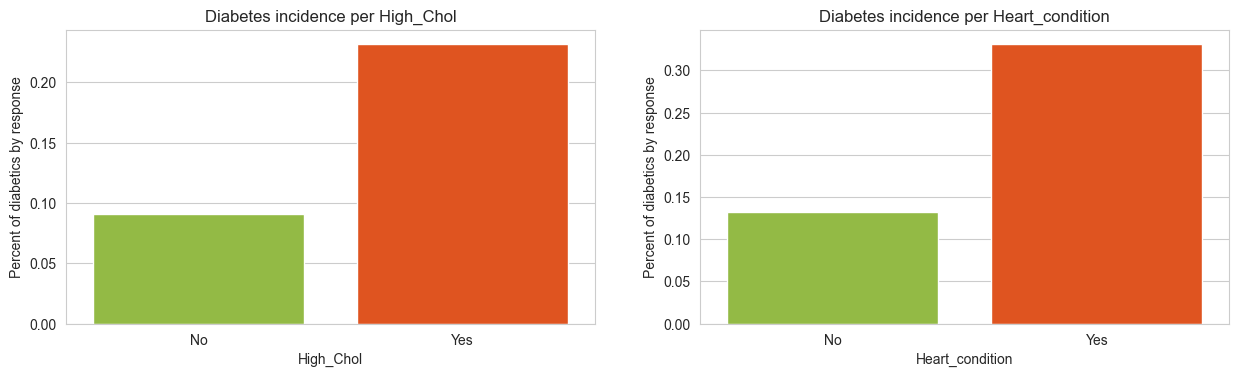

In [24]:
plot_diabetes_by_feature(["High_Chol","Heart_condition"])

#### Diabetes count: High Cholesterol and Heart condition

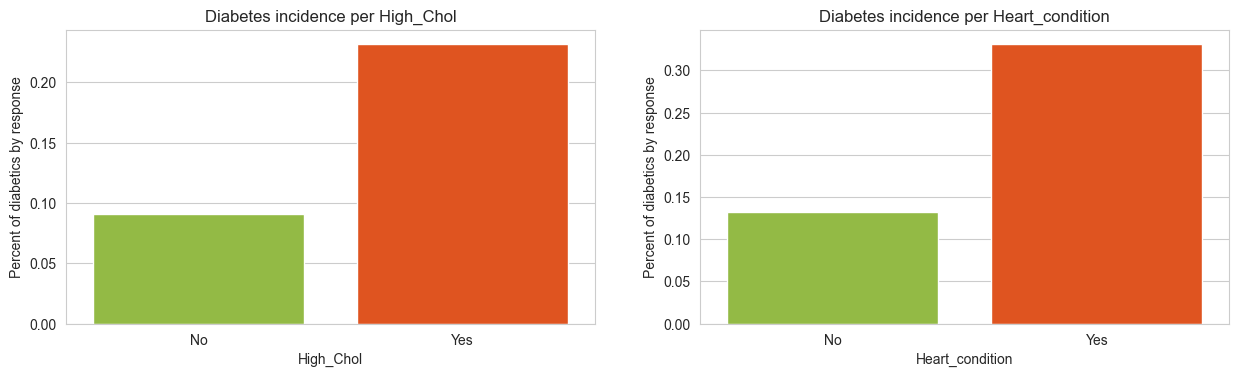

In [25]:
plot_diabetes_by_feature(["High_Chol","Heart_condition"])

#### Diabetes count: High BP and Stroke

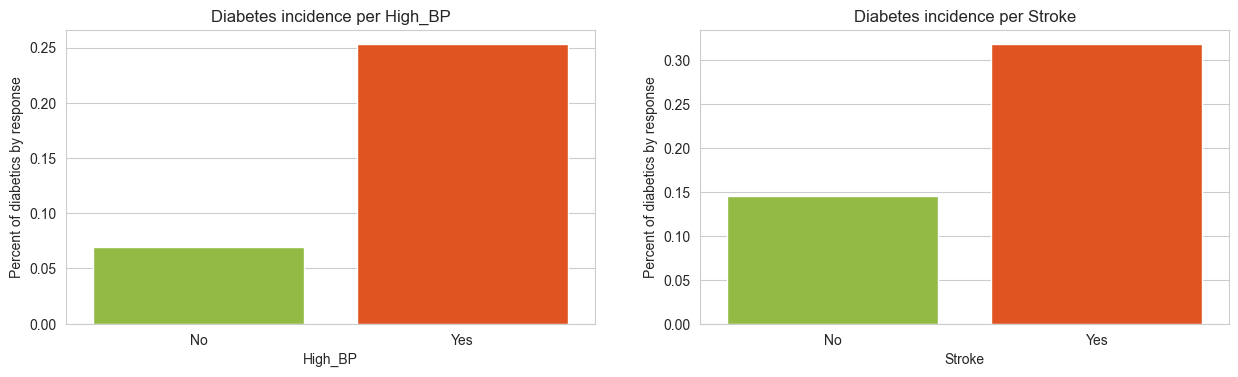

In [26]:
plot_diabetes_by_feature(["High_BP","Stroke"])

#### Diabetes count: Smoke and Heavy Drinking

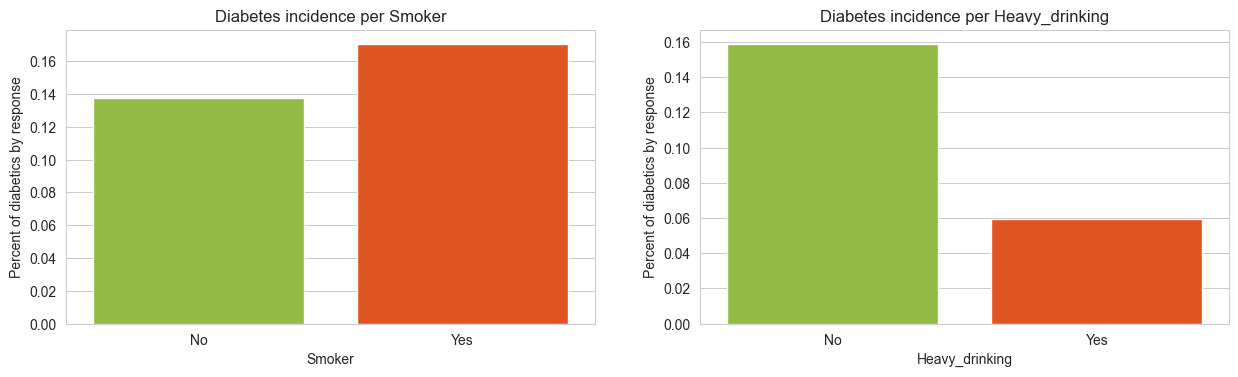

In [27]:
plot_diabetes_by_feature(["Smoker","Heavy_drinking"])

#### Diabetes count: Fruits and Veggies

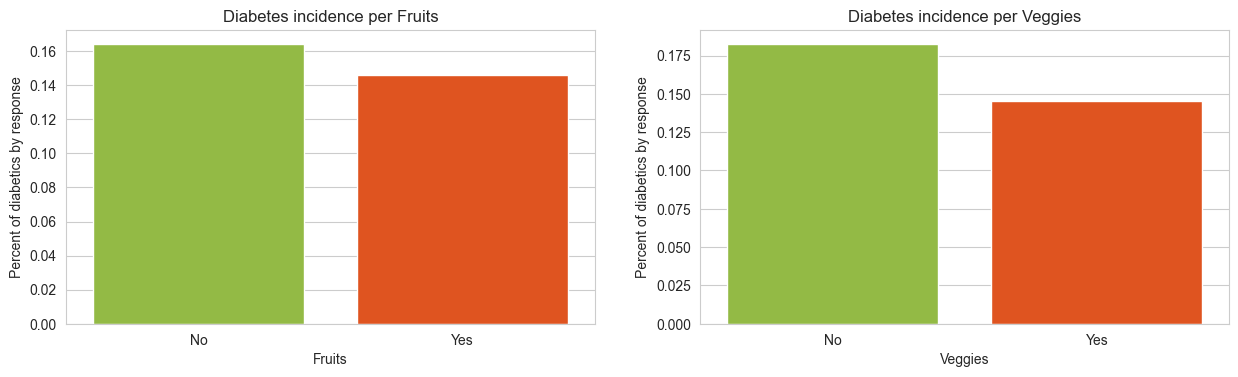

In [28]:
plot_diabetes_by_feature(["Fruits","Veggies"])

#### Diabetes count: Physical activity Difficulty Walking

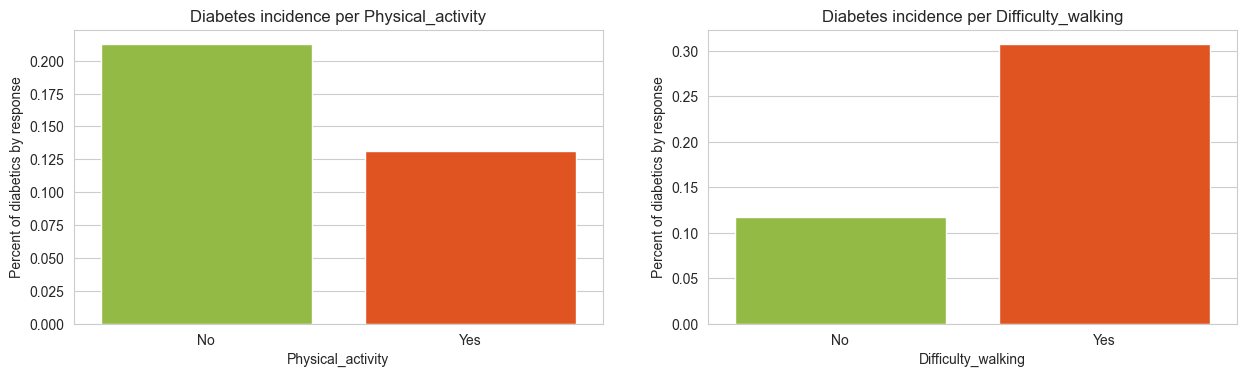

In [29]:
plot_diabetes_by_feature(["Physical_activity","Difficulty_walking"])

#### Diabetes count by general health

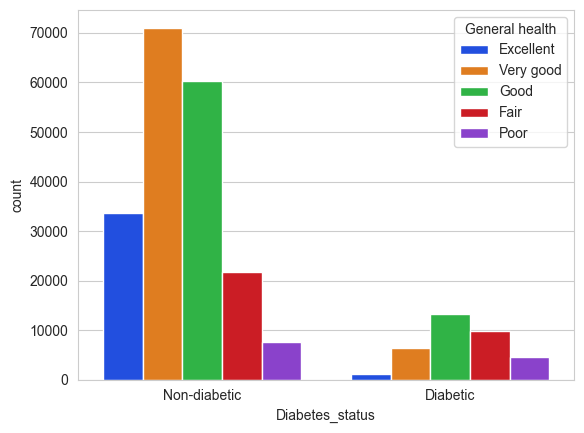

In [30]:
ax = sns.countplot(data=df, x="Diabetes_status", hue="General_health", palette='bright')
ax.set_xticklabels(diagnose_dict.values())
plt.legend(general_health_dict.values(),title="General health");

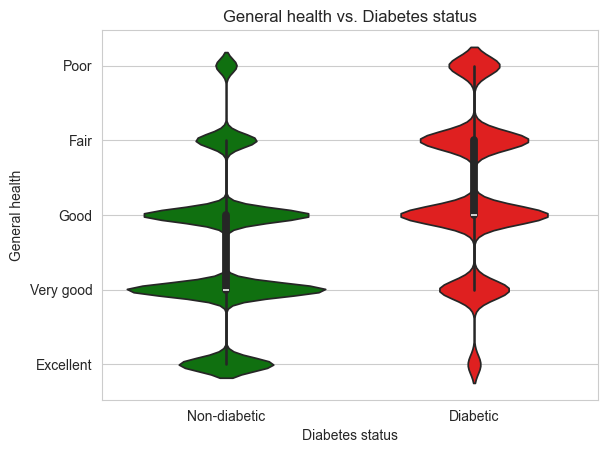

In [31]:
ax = sns.violinplot(data=df, y="General_health", x= "Diabetes_status", palette=['green','red'],common_norm=True)

plt.xticks([0,1],list(diagnose_dict.values()))
plt.yticks(list(general_health_dict.keys()),list(general_health_dict.values()))
#ax.set_yticklabels(general_health_dict.keys(),general_health_dict.values());
plt.ylabel("General health")
plt.xlabel("Diabetes status");
plt.title("General health vs. Diabetes status");

#### Diabetes count by age group

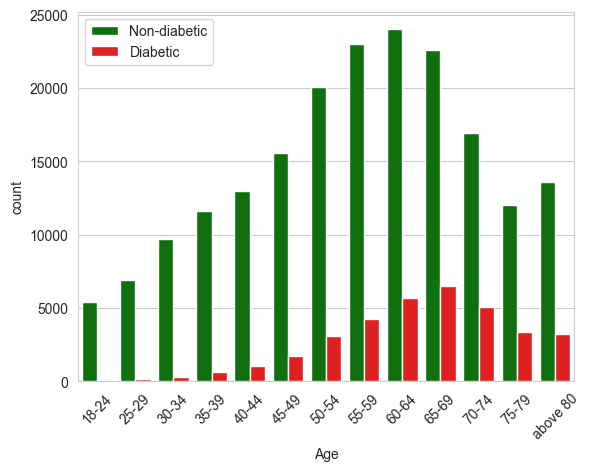

In [32]:
ax = sns.countplot(data=df, x="Age", hue="Diabetes_status", palette=['green','red'])

ax.set_xticklabels(age_dict.values(),rotation=45)
plt.legend(diagnose_dict.values());

### Diabetes count by Education and Income

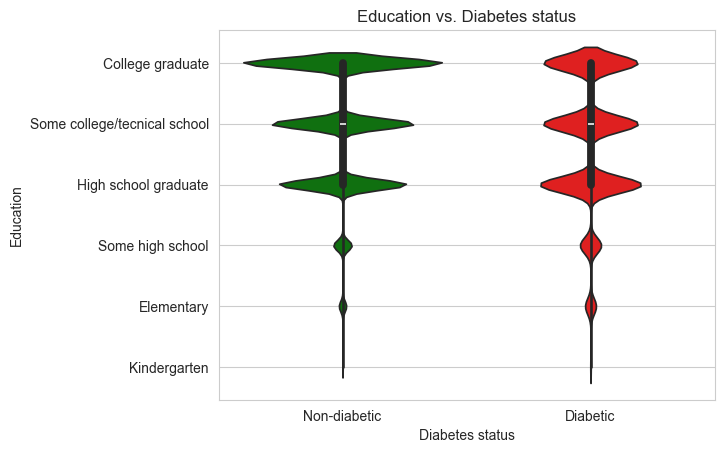

In [33]:
ax = sns.violinplot(data=df, y="Education", x= "Diabetes_status", palette=['green','red'],common_norm=True)

plt.xticks([0,1],list(diagnose_dict.values()))
plt.yticks(list(education_dict.keys()),list(education_dict.values()))
#ax.set_yticklabels(general_health_dict.keys(),general_health_dict.values());
plt.ylabel("Education")
plt.xlabel("Diabetes status");
plt.title("Education vs. Diabetes status");

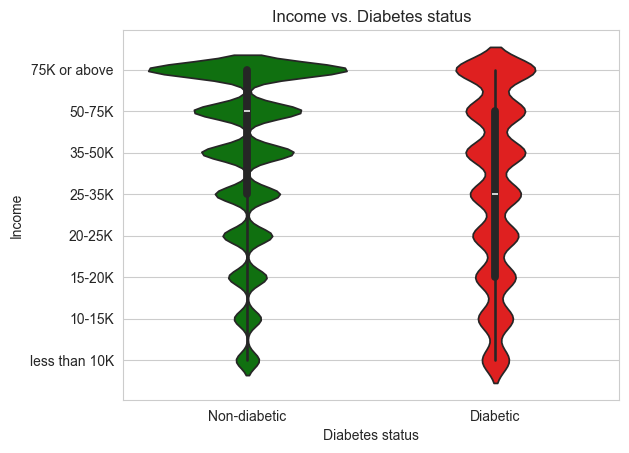

In [34]:
ax = sns.violinplot(data=df, y="Income", x= "Diabetes_status", palette=['green','red'],common_norm=True)

plt.xticks([0,1],list(diagnose_dict.values()))
plt.yticks(list(income_dict.keys()),list(income_dict.values()))
#ax.set_yticklabels(general_health_dict.keys(),general_health_dict.values());
plt.ylabel("Income")
plt.xlabel("Diabetes status");
plt.title("Income vs. Diabetes status");

### Diabetes count: Physical and Mental health

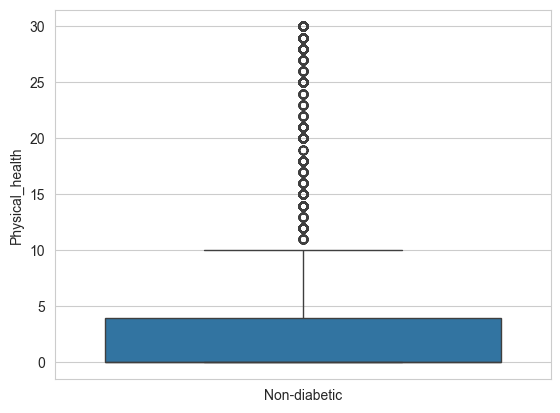

In [35]:
#plot_diabetes_by_feature(["Physical_health","Mental_health"])
ax= sns.boxplot(data=df,
             y="Physical_health",
             #x="Diabetes_status",palette=['green','red']
               );
ax.set_xticklabels(diagnose_dict.values());

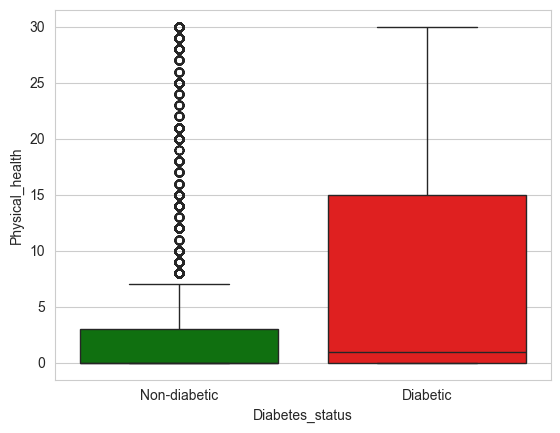

In [36]:
#plot_diabetes_by_feature(["Physical_health","Mental_health"])
ax= sns.boxplot(data=df,
             y="Physical_health",
             x="Diabetes_status",palette=['green','red']);
ax.set_xticklabels(diagnose_dict.values());

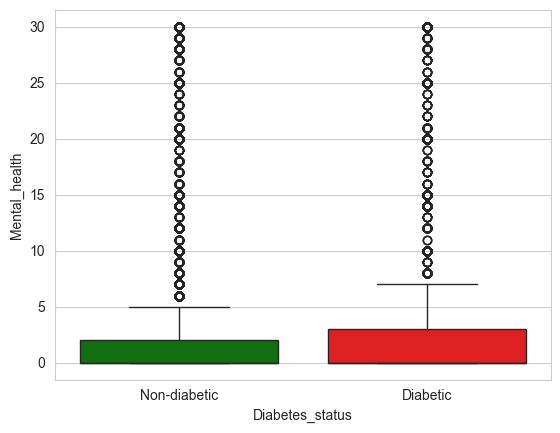

In [37]:
ax= sns.boxplot(data=df,
             y="Mental_health",
             x="Diabetes_status",palette=['green','red']);
ax.set_xticklabels(diagnose_dict.values());

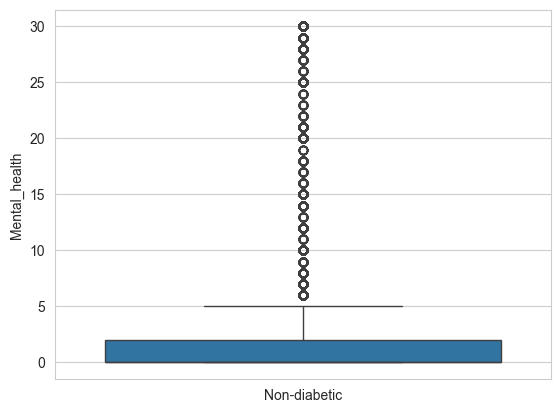

In [38]:
ax= sns.boxplot(data=df,
             y="Mental_health",
             #x="Diabetes_status",palette=['green','red']
               );
ax.set_xticklabels(diagnose_dict.values());

#### Diabetes count by BMI

Do we need to remove outliers?

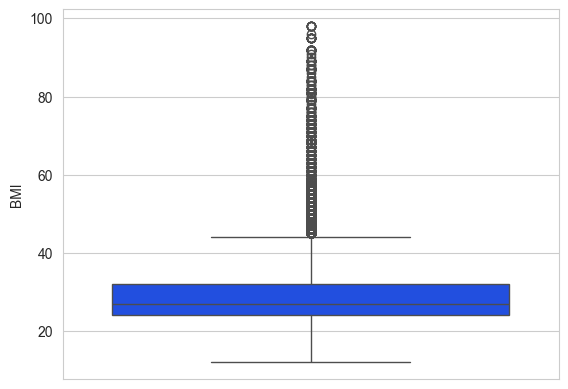

In [39]:
#### Box plot
ax= sns.boxplot(data=df,
             y="BMI",
             palette='bright');
#ax.set_xticklabels(diagnose_dict.values());
#plt.legend(diagnose_dict.values(),loc='upper right');

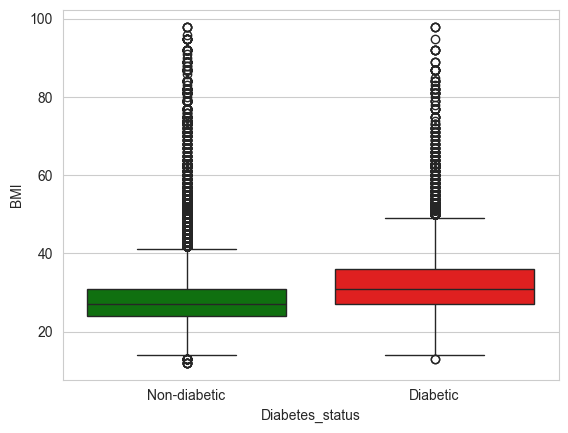

In [40]:
#### Box plot
ax= sns.boxplot(data=df,
             y="BMI",
             x="Diabetes_status",palette=['green','red']);
ax.set_xticklabels(diagnose_dict.values());
#plt.legend(diagnose_dict.values(),loc='upper right');

Remarks: We have few outliers in the BMI. We will work like this for now

### Bivariate analysis

### Correlation between variables

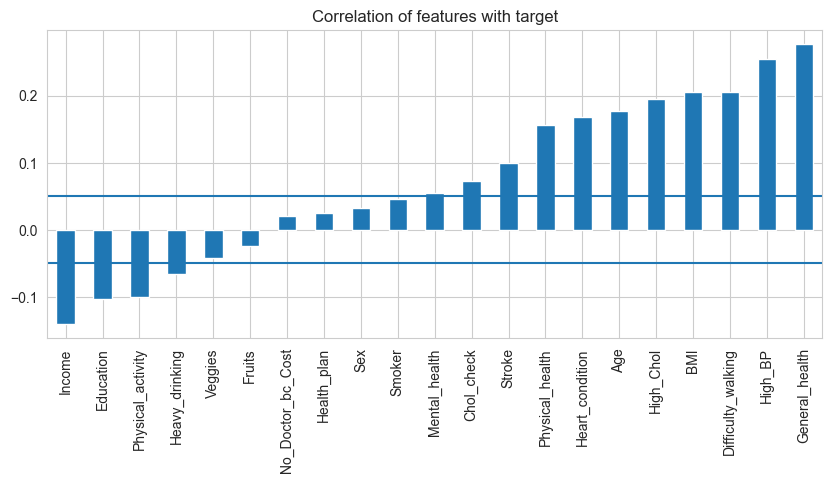

In [41]:
test= df.drop(columns=['Diabetes_status']).corrwith(df['Diabetes_status']).sort_values();

test.plot(kind='bar'
          ,figsize = (10,4),title='Correlation of features with target');
plt.axhline(0.05)
plt.axhline(-0.05);

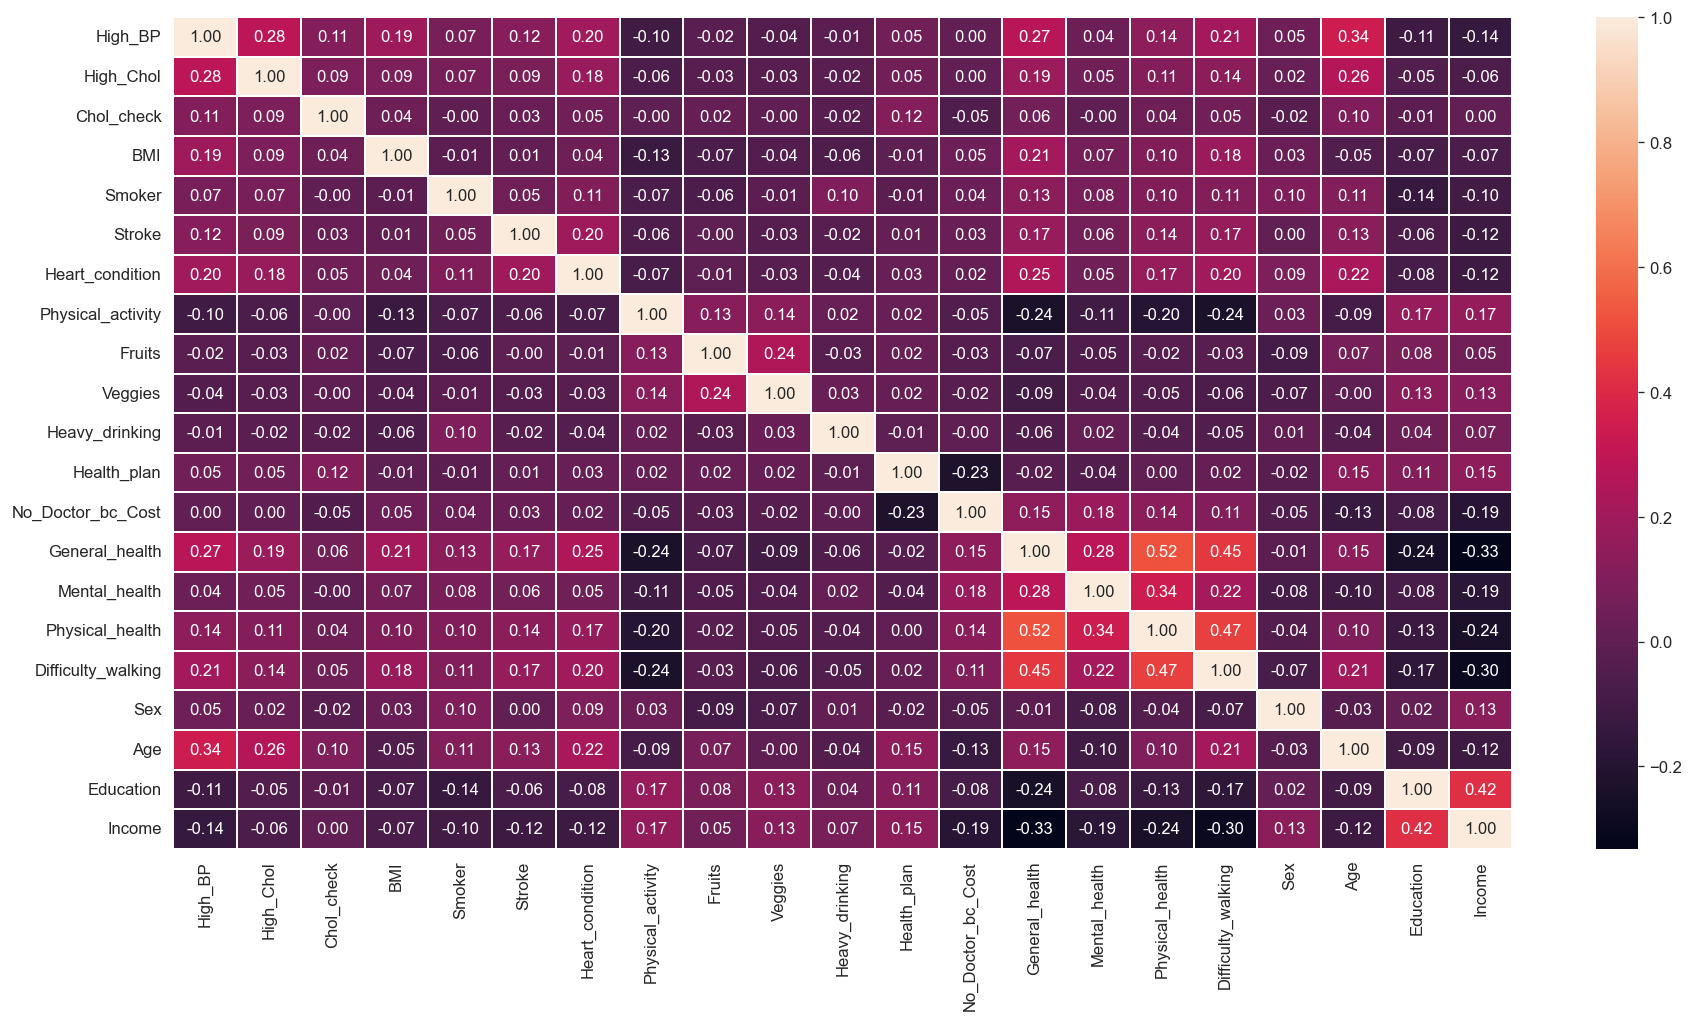

In [42]:
corr_matrix = df.drop(columns=['Diabetes_status']).corr()

plt.figure(dpi = 120,figsize= (18,9))

sns.heatmap(corr_matrix,fmt = ".2f",annot=True,lw=1);

### Remarks:
- 'Veggies, 'Fruits', 'No_Doctor_bc_Cost', 'Health_plan', 'Sex', 'Smoker' (correlation with the target < 0.05)
- Education (moderate correlation with Income)
- Physical_health (mild to moderate correlation with General_Health)
- ** NEXT ** : we perform some feature selection and verify if these features effectively go away.
  